# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
clean_city_list = []
max_temp_list = []
humidity_list = []
cloudiness_list = []
wind_speed_list = []
country_list = []
date_list = []
lat_list = []
lng_list = []
index_count = 1
index_max = 50
set_count = 1

print('Beginning Data Retrieval')
print('----------------------------------------')

for index, city in enumerate(cities, start = 1):
    
    base_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'
    
    try: 
        weather_json = requests.get(base_url).json()
        max_temp_list.append(weather_json['main']['temp_max'])
        humidity_list.append(weather_json['main']['humidity'])
        cloudiness_list.append(weather_json['clouds']['all'])
        wind_speed_list.append(weather_json['wind']['speed'])
        country_list.append(weather_json['sys']['country'])
        date_list.append(weather_json['dt'])
        clean_city_list.append(city)
        lat_list.append(weather_json['coord']['lat'])
        lng_list.append(weather_json['coord']['lon'])
        print(f'Processing record {index_count} of Set {set_count} | {city}')
        index_count = index_count + 1
        if index_count > index_max:
            index_count = 1
            set_count = set_count + 1
            
    except:
        print('City not found. Skipping...')

print('----------------------------------------')
print('Data Retrieval Complete')
print('----------------------------------------')

Beginning Data Retrieval
----------------------------------------
Processing record 1 of Set 1 | hermanus
Processing record 2 of Set 1 | mar del plata
Processing record 3 of Set 1 | cape town
Processing record 4 of Set 1 | tupik
Processing record 5 of Set 1 | victoria
Processing record 6 of Set 1 | vaini
Processing record 7 of Set 1 | kruisfontein
City not found. Skipping...
Processing record 8 of Set 1 | pozoblanco
City not found. Skipping...
City not found. Skipping...
Processing record 9 of Set 1 | safaga
Processing record 10 of Set 1 | yellowknife
Processing record 11 of Set 1 | husavik
Processing record 12 of Set 1 | constitucion
Processing record 13 of Set 1 | puerto ayora
Processing record 14 of Set 1 | bethanien
Processing record 15 of Set 1 | punta arenas
Processing record 16 of Set 1 | port hardy
Processing record 17 of Set 1 | bethel
Processing record 18 of Set 1 | bredasdorp
Processing record 19 of Set 1 | rikitea
Processing record 20 of Set 1 | klaksvik
Processing record 2

Processing record 36 of Set 4 | samana
Processing record 37 of Set 4 | ayan
Processing record 38 of Set 4 | esperance
Processing record 39 of Set 4 | katherine
Processing record 40 of Set 4 | asau
Processing record 41 of Set 4 | kurilsk
Processing record 42 of Set 4 | namibe
Processing record 43 of Set 4 | upernavik
Processing record 44 of Set 4 | ontario
Processing record 45 of Set 4 | east london
Processing record 46 of Set 4 | sao francisco
Processing record 47 of Set 4 | tirumakudal narsipur
Processing record 48 of Set 4 | atar
Processing record 49 of Set 4 | griffith
City not found. Skipping...
Processing record 50 of Set 4 | mount isa
Processing record 1 of Set 5 | raga
City not found. Skipping...
Processing record 2 of Set 5 | nome
City not found. Skipping...
Processing record 3 of Set 5 | los llanos de aridane
Processing record 4 of Set 5 | sola
Processing record 5 of Set 5 | mandali
Processing record 6 of Set 5 | holoby
Processing record 7 of Set 5 | houma
Processing record 8 

Processing record 29 of Set 8 | lodeynoye pole
Processing record 30 of Set 8 | arandis
Processing record 31 of Set 8 | ust-nera
Processing record 32 of Set 8 | carutapera
Processing record 33 of Set 8 | hameenlinna
Processing record 34 of Set 8 | el viejo
Processing record 35 of Set 8 | la macarena
Processing record 36 of Set 8 | la quinta
Processing record 37 of Set 8 | kovdor
Processing record 38 of Set 8 | karoi
Processing record 39 of Set 8 | dali
Processing record 40 of Set 8 | port hedland
Processing record 41 of Set 8 | mingshui
Processing record 42 of Set 8 | makakilo city
Processing record 43 of Set 8 | mahajanga
Processing record 44 of Set 8 | pasni
Processing record 45 of Set 8 | katangli
City not found. Skipping...
Processing record 46 of Set 8 | zaprudnya
Processing record 47 of Set 8 | loreto
Processing record 48 of Set 8 | nautla
Processing record 49 of Set 8 | sioux lookout
City not found. Skipping...
Processing record 50 of Set 8 | la palma
Processing record 1 of Set 9

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_data = pd.DataFrame({'City': clean_city_list,
                         'Lat': lat_list,
                          'Lng': lng_list,
                          'Max Temp': max_temp_list,
                          'Humidity': humidity_list,
                          'Cloudiness': cloudiness_list,
                          'Wind Speed': wind_speed_list,
                          'Country': country_list,
                          'Date': date_list})
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,291.98,45,60,3.13,ZA,1624157292
1,mar del plata,-38.0023,-57.5575,280.44,68,75,0.89,AR,1624157292
2,cape town,-33.9258,18.4232,292.10,42,0,3.60,ZA,1624157065
3,tupik,54.4253,119.9327,290.71,75,85,2.36,RU,1624157293
4,victoria,22.2855,114.1577,306.18,83,100,3.13,HK,1624157155


In [5]:
city_data.to_csv('city_data.csv')

In [6]:
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,5.600000e+02
mean,21.432796,19.599365,293.489375,68.794643,57.294643,3.552768,1.624157e+09
std,33.105986,87.751547,7.640830,22.325266,39.730451,2.351620,1.055601e+02
min,-54.800000,-179.166700,273.180000,8.000000,0.000000,0.000000,1.624157e+09
25%,-3.938550,-53.699300,287.895000,53.750000,13.000000,1.680000,1.624157e+09
50%,25.609900,21.466750,294.395000,74.000000,72.000000,3.090000,1.624157e+09
75%,49.619750,92.237525,299.302500,87.000000,98.000000,5.017500,1.624157e+09
max,78.218600,178.004200,317.730000,100.000000,100.000000,14.610000,1.624158e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
humidity_index = city_data.index[city_data['Humidity'] > 100]
humidity_index

Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data.drop(index = humidity_index, inplace = False)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,291.98,45,60,3.13,ZA,1624157292
1,mar del plata,-38.0023,-57.5575,280.44,68,75,0.89,AR,1624157292
2,cape town,-33.9258,18.4232,292.10,42,0,3.60,ZA,1624157065
3,tupik,54.4253,119.9327,290.71,75,85,2.36,RU,1624157293
4,victoria,22.2855,114.1577,306.18,83,100,3.13,HK,1624157155
...,...,...,...,...,...,...,...,...,...
555,finschhafen,-6.6024,147.8681,301.39,71,87,4.57,PG,1624157560
556,camana,-16.6228,-72.7111,290.29,89,61,2.98,PE,1624157416
557,indian head,38.6001,-77.1622,297.89,94,75,0.00,US,1624157561
558,san carlos de bariloche,-41.1456,-71.3082,275.06,60,0,2.57,AR,1624157265


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature (F)')

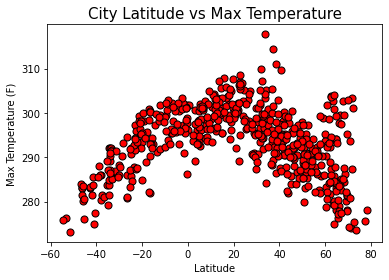

In [9]:
lat_plot = clean_city_data.plot(kind = 'scatter', x = 'Lat', y = 'Max Temp', color = 'red', edgecolor = 'black', s = 50)
plt.title('City Latitude vs Max Temperature', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity (%)')

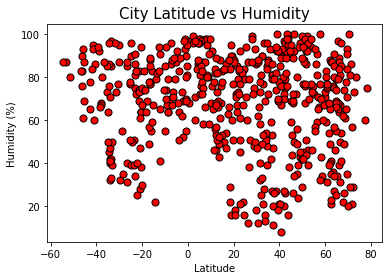

In [10]:
lat_plot = clean_city_data.plot(kind = 'scatter', x = 'Lat', y = 'Humidity', color = 'red', edgecolor = 'black', s = 50)
plt.title('City Latitude vs Humidity', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness (%)')

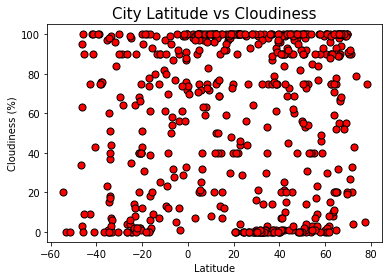

In [11]:
lat_plot = clean_city_data.plot(kind = 'scatter', x = 'Lat', y = 'Cloudiness', color = 'red', edgecolor = 'black', s = 50)
plt.title('City Latitude vs Cloudiness', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph)')

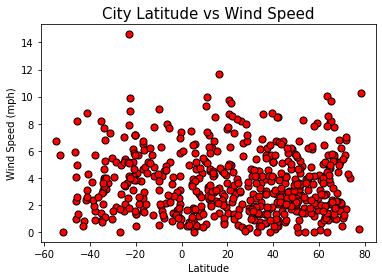

In [12]:
lat_plot = clean_city_data.plot(kind = 'scatter', x = 'Lat', y = 'Wind Speed', color = 'red', edgecolor = 'black', s = 50)
plt.title('City Latitude vs Wind Speed', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('scatter_plots/sh_temp_lat.png')

## Linear Regression

In [16]:
#Create Dataframes for northern and southern hemisphere cities
north_hemi = clean_city_data.loc[clean_city_data['Lat'] > 0]
south_hemi = clean_city_data.loc[clean_city_data['Lat'] < 0]
south_hemi = south_hemi.reset_index(drop = True)
north_hemi = north_hemi.reset_index(drop = True)

In [17]:
south_hemi.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,291.98,45,60,3.13,ZA,1624157292
1,mar del plata,-38.0023,-57.5575,280.44,68,75,0.89,AR,1624157292
2,cape town,-33.9258,18.4232,292.10,42,0,3.60,ZA,1624157065
3,vaini,-21.2000,-175.2000,299.24,83,20,3.09,TO,1624157294
4,kruisfontein,-34.0033,24.7314,289.05,32,18,4.62,ZA,1624157260


In [18]:
north_hemi.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tupik,54.4253,119.9327,290.71,75,85,2.36,RU,1624157293
1,victoria,22.2855,114.1577,306.18,83,100,3.13,HK,1624157155
2,pozoblanco,38.3791,-4.8483,286.47,74,61,1.69,ES,1624157295
3,safaga,26.7292,33.9365,298.12,38,0,6.54,EG,1624157296
4,yellowknife,62.4560,-114.3525,287.44,41,75,4.12,CA,1624157297


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is 0.38593337294905633


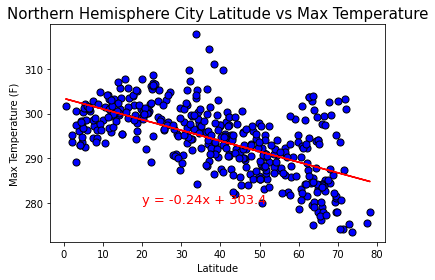

In [35]:
x_values = north_hemi['Lat']
y_values = north_hemi['Max Temp']

slope, intercept, r, p, se = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-squared value is {r**2}')

nh_plot = north_hemi.plot(kind = 'scatter', x = 'Lat', y = 'Max Temp',color = 'blue', edgecolor = 'black', s = 50)
plt.plot(x_values, regression_values,'r-')
plt.annotate(line_eq, (20,280), fontsize=13, color = 'r')
plt.title('Northern Hemisphere City Latitude vs Max Temperature', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('scatter_plots/nh_temp_lat.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is 0.6567628157379201


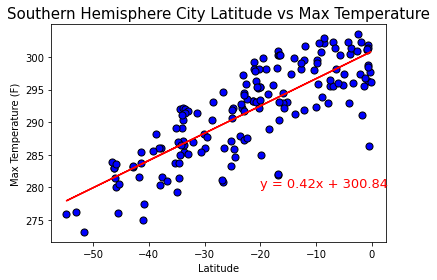

In [34]:
x_values = south_hemi['Lat']
y_values = south_hemi['Max Temp']

slope, intercept, r, p, se = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-squared value is {r**2}')

nh_plot = south_hemi.plot(kind = 'scatter', x = 'Lat', y = 'Max Temp',color = 'blue', edgecolor = 'black', s = 50)
plt.plot(x_values, regression_values,'r-')
plt.annotate(line_eq, (-20,280), fontsize=13, color = 'r')
plt.title('Southern Hemisphere City Latitude vs Max Temperature', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('scatter_plots/sh_temp_lat.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 0.02001586756294381


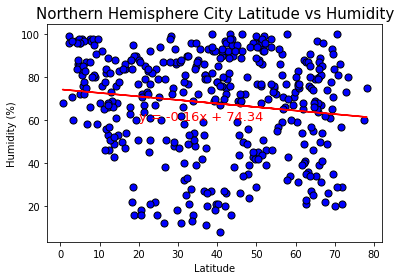

In [33]:
x_values = north_hemi['Lat']
y_values = north_hemi['Humidity']

slope, intercept, r, p, se = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-squared value is {r**2}')

nh_plot = north_hemi.plot(kind = 'scatter', x = 'Lat', y = 'Humidity',color = 'blue', edgecolor = 'black', s = 50)
plt.plot(x_values, regression_values,'r-')
plt.annotate(line_eq, (20,60), fontsize=13, color = 'r')
plt.title('Northern Hemisphere City Latitude vs Humidity', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('scatter_plots/nh_humid_lat.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is 0.0031371556436610533


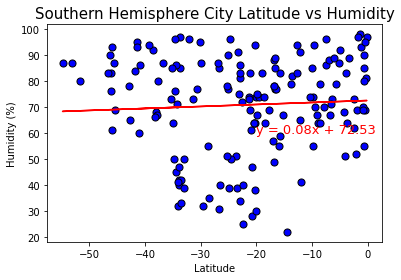

In [32]:
x_values = south_hemi['Lat']
y_values = south_hemi['Humidity']

slope, intercept, r, p, se = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-squared value is {r**2}')

nh_plot = south_hemi.plot(kind = 'scatter', x = 'Lat', y = 'Humidity',color = 'blue', edgecolor = 'black', s = 50)
plt.plot(x_values, regression_values,'r-')
plt.annotate(line_eq, (-20,60), fontsize=13, color = 'r')
plt.title('Southern Hemisphere City Latitude vs Humidity', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('scatter_plots/sh_humid_lat.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.0031831525456630415


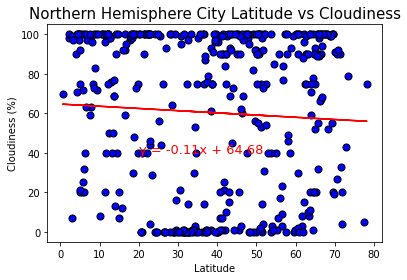

In [31]:
x_values = north_hemi['Lat']
y_values = north_hemi['Cloudiness']

slope, intercept, r, p, se = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-squared value is {r**2}')

nh_plot = north_hemi.plot(kind = 'scatter', x = 'Lat', y = 'Cloudiness',color = 'blue', edgecolor = 'black', s = 50)
plt.plot(x_values, regression_values,'r-')
plt.annotate(line_eq, (20,40), fontsize=13, color = 'r')
plt.title('Northern Hemisphere City Latitude vs Cloudiness', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('scatter_plots/nh_cloud_lat.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is 0.046247112516766976


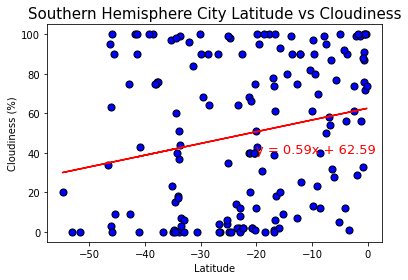

In [30]:
x_values = south_hemi['Lat']
y_values = south_hemi['Cloudiness']

slope, intercept, r, p, se = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-squared value is {r**2}')

nh_plot = south_hemi.plot(kind = 'scatter', x = 'Lat', y = 'Cloudiness',color = 'blue', edgecolor = 'black', s = 50)
plt.plot(x_values, regression_values,'r-')
plt.annotate(line_eq, (-20,40), fontsize=13, color = 'r')
plt.title('Southern Hemisphere City Latitude vs Cloudiness', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('scatter_plots/sh_cloud_lat.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is 0.00010043516270246708


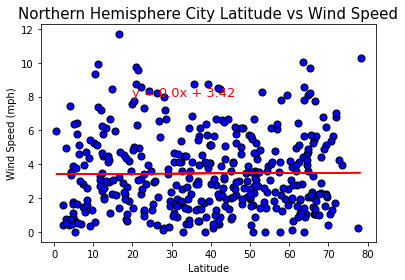

In [29]:
x_values = north_hemi['Lat']
y_values = north_hemi['Wind Speed']

slope, intercept, r, p, se = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-squared value is {r**2}')

nh_plot = north_hemi.plot(kind = 'scatter', x = 'Lat', y = 'Wind Speed',color = 'blue', edgecolor = 'black', s = 50)
plt.plot(x_values, regression_values,'r-')
plt.annotate(line_eq, (20,8), fontsize=13, color = 'r')
plt.title('Northern Hemisphere City Latitude vs Wind Speed', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('scatter_plots/nh_wind_lat.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is 0.0011048933039585083


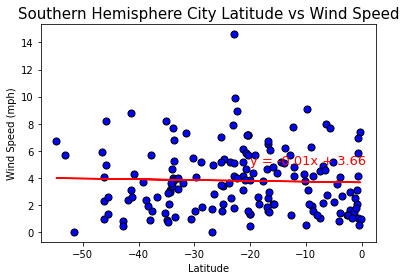

In [28]:
x_values = south_hemi['Lat']
y_values = south_hemi['Wind Speed']

slope, intercept, r, p, se = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'The r-squared value is {r**2}')

nh_plot = south_hemi.plot(kind = 'scatter', x = 'Lat', y = 'Wind Speed',color = 'blue', edgecolor = 'black', s = 50)
plt.plot(x_values, regression_values,'r-')
plt.annotate(line_eq, (-20,5), fontsize=13, color = 'r')
plt.title('Southern Hemisphere City Latitude vs Wind Speed', fontsize = 15)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('scatter_plots/sh_wind_lat.png')